In [25]:
import matplotlib.pyplot as plt
import scipy.io as sio
import os
import numpy as np
import pandas as pd

In [26]:
PATH = 'C:/Users/Zymieth/Documents/MATLAB/Examples/predmaint/MultiClassFaultDetectionUsingSimDataExample/'
PATH = f'{PATH}mat_data/'
PATH

'C:/Users/Zymieth/Documents/MATLAB/Examples/predmaint/MultiClassFaultDetectionUsingSimDataExample/mat_data/'

## Description

Final result is a set of two numpy matrices. The first contains 1600 time series, 400 baseline behavior (no fault) and 400 for each of the three fault types, labeled in the last column (label 1: no fault, label 2: leak fault, label 3: block fault, label 4: bearing fault). The second one includes 200 time series per class, collected with reference rpm 1800. The entire transient of the physical system is included. If necessary, for a STATIC analysis (rpm of the motor assumed constant) removing the first 0.8 seconds from each time series is suggested (exactly the first 800 elements of each row, since the sampling rate is 0.001s).

Note that the rpm values of 900 and 1800 are only reference values used in the control scheme of the DC motor, not the actual measurements during operation (although they can be considered to be oscillating close to these quantities).

In [27]:
def readFromFolder(PATH):
    '''
    Read mat files from specified PATH
    '''
    list_of_data = []
    for file in os.listdir(PATH):
        x = sio.loadmat(f'{PATH}'+ file, appendmat=True)
        list_of_data.append(x)
    return list_of_data

In [28]:
def preprocess_mat(f):
    labels = np.concatenate((np.ones(100),2*np.ones(100),3*np.ones(100),4*np.ones(100)))
    df = pd.DataFrame(data=np.transpose(f))
    df[2001] = labels
    return df

In [29]:
l = []
d = {1:'A',2:'B',3:'C',4:'D',5:'E',6:'F'}
i = 1
for file in os.listdir(PATH):
    x = sio.loadmat(f'{PATH}'+ file, appendmat=True)
    x = x[d[i]]
    l.append(preprocess_mat(x))
    i += 1

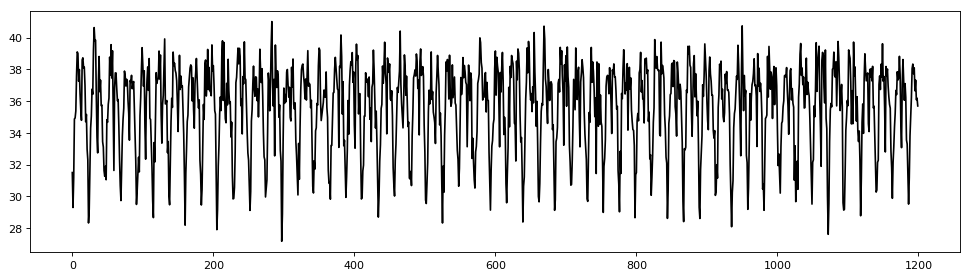

In [30]:
# selection starts from 0.8s since to skip the transient of the pump
plt.figure(num=None, figsize=(15, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.array(l[0])[0,800:2000], color='black')

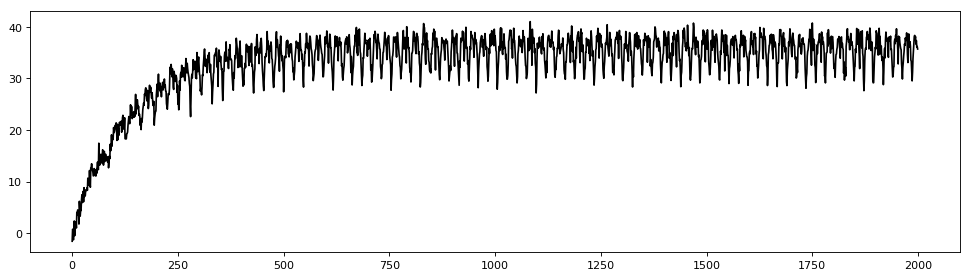

In [31]:
# we can see the transient more clearly here:
plt.figure(num=None, figsize=(15, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.array(l[0])[0,:2000],color='black')

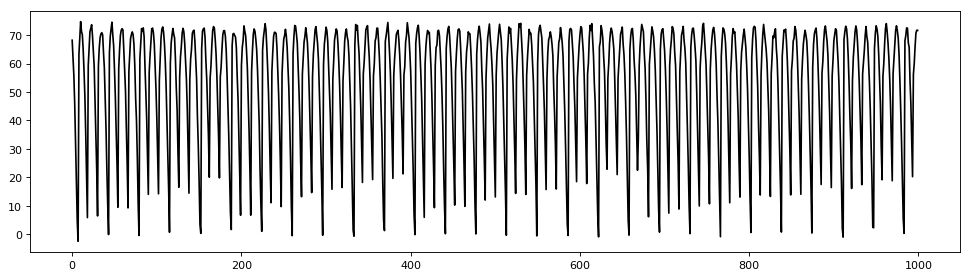

In [49]:
# an example of faulty behavior at high rpm (1800):
plt.figure(num=None, figsize=(15, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.array(l[4])[399,1000:2000],color='black')

#### Sorting by label and saving in npy format

In [43]:
rpm0 = np.concatenate((np.array(l[0]),np.array(l[1]),np.array(l[2]),np.array(l[3])))
rpm1 = np.concatenate((np.array(l[4]),np.array(l[5])))

# sorting according to label to reorganize
rpm0 = rpm0[rpm0[:,2001].argsort()]
rpm1 = rpm1[rpm1[:,2001].argsort()]

In [44]:
np.save('900_rpm.npy', rpm0)
np.save('1800_rpm.npy', rpm1)